In [1]:
def feature_imp_score(i,X,y):
    # Feature selection by importance score
    feature_names= np.array(X.columns.tolist())
    classifier=RandomForestClassifier(n_estimators=100,random_state=21)
    classifier.fit(X,y)
    feature_imp_scores=pd.DataFrame({'fea_imp_score': classifier.feature_importances_})
    feature_imp_scores['Features']=feature_names
    feature_imp_scores_sorted = feature_imp_scores.sort_values(by=feature_imp_scores.columns[0], ascending=False)
    top_k = feature_imp_scores_sorted['Features'].head(i).tolist()         # top k rows (names + scores)
    msg = f'\nSelected : {i} features using feature importance score:\n{top_k}'
    # log_insight(msg)
    # #Visualise the feature importance score
    # plt.figure(figsize=(8,5))
    # plt.bar(feature_imp_scores_sorted["Features"], feature_imp_scores_sorted["fea_imp_score"])
    # plt.xlabel("Features")
    # plt.ylabel("Feature Importance Score")
    # plt.title(f"Feature Importance Plot k={i}")
    # plt.xticks(rotation=45)
    # plt.tight_layout()?
    # fig_path = os.path.join(plots_dir, f'feature_importance_top_{i}.png')
    # plt.savefig(fig_path)
 

    model=SelectFromModel(classifier,prefit=True)
    X_new=pd.DataFrame(model.transform(X))
    print(top_k)
    X_new_k = X_new[top_k]          # DataFrame with top i features
    return X_new_k
   

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import data_import
import data_preprocessing
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import logging
import os
import feature_engineering
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, chi2
import data_import
import data_preprocessing
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectFromModel
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import logging
import os


2025-11-15 15:12:29,019 - data_import - DEBUG - Data loaded from C:\MSML\SEM 1\ML\ML Projects\Project 2\Feature-Selection-and-Dimensionality-Reduction\data\pollution_dataset.csv
2025-11-15 15:12:29,027 - data_preprocess - DEBUG - Data Preprocessing completed
2025-11-15 15:12:29,682 - feature_engineering - INFO - 
Selected : 3 features using feature importance score:
['CO', 'Proximity_to_Industrial_Areas', 'SO2']


(5000, 3)


,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303


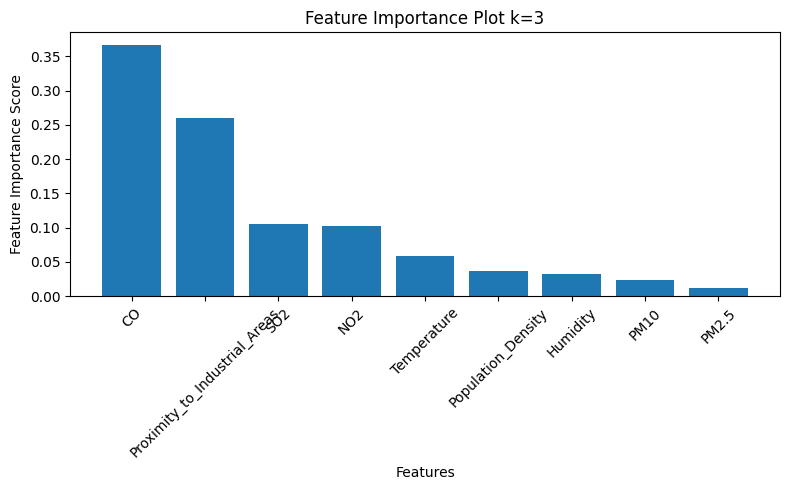

In [4]:

data=data_import.load_data()
data=data_preprocessing.data_preprocess(data)
k=3
X=data.drop(columns='Air Quality')
y=data['Air Quality']
df=feature_engineering.feature_imp_score(k,X,y)
print(df.shape)
X.head()



2025-11-13 21:42:43,686 - data_import - DEBUG - Data loaded from C:\MSML\SEM 1\ML\ML Projects\Project 2\Feature-Selection-and-Dimensionality-Reduction\data\pollution_dataset.csv


2025-11-13 21:42:43,694 - data_preprocess - DEBUG - Data Preprocessing completed
2025-11-13 21:42:44,058 - feature_engineering - INFO - LDA (k=1) explained variance ratio: [0.9822482]


          0
0  0.019867
1  1.197301
2  0.654542
3 -3.977871
4 -3.418079


2025-11-13 21:42:44,324 - feature_engineering - INFO - PCA (k=2) explained variance ratio: [0.55741525 0.14969902]
2025-11-13 21:42:44,333 - feature_engineering - INFO - 
Selected 3 features using univariate feature selection:
['PM2.5' 'PM10' 'Population_Density']


          0         1
0 -0.859267 -0.404720
1  0.336449 -1.236816
2  0.545775  0.035157
3 -2.327524 -0.056177
4 -2.046958  0.111508
      0     1      2
0   5.2  17.9  319.0
1   2.3  12.2  611.0
2  26.7  33.8  619.0
3   6.1   6.3  551.0
4   6.9  16.0  303.0


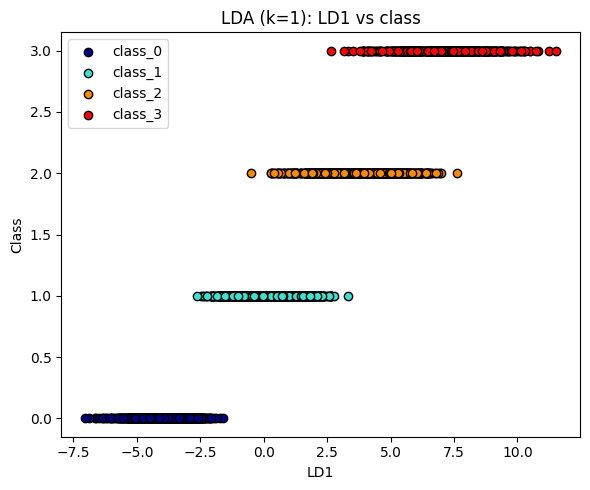

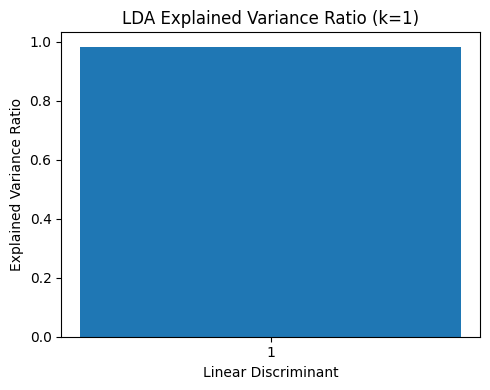

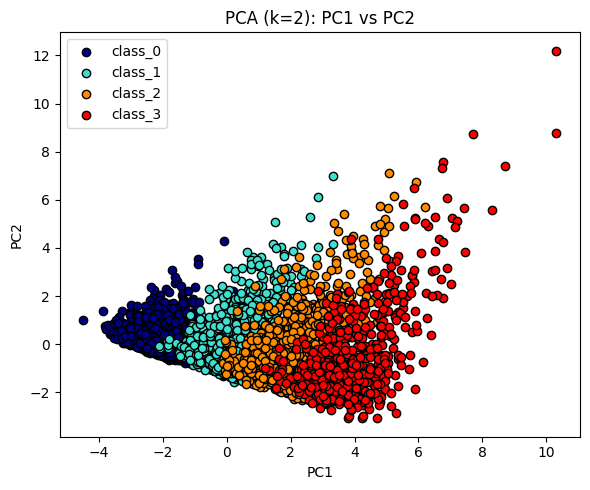

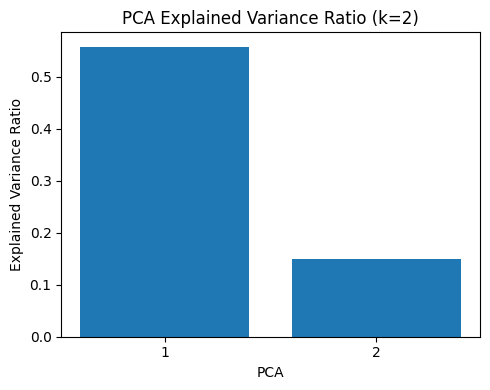

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import data_import
import data_preprocessing
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import logging
import os
import feature_engineering

# Create Log directory

log_dir='logs'
# os.makedirs(log_dir,exist_ok=True)

#Create Logger
logger=logging.getLogger('model_training')
logger.setLevel("DEBUG")

#Stream console handler
console_handler=logging.StreamHandler()
console_handler.setLevel('DEBUG')

#Set log file path
log_file_path=os.path.join(log_dir,'model_training.log')
file_handler=logging.FileHandler(log_file_path)
file_handler.setLevel('DEBUG')

# Define Formatter
log_formatter=logging.Formatter('%(asctime)s - %(name)s - %(levelname)s - %(message)s')
console_handler.setFormatter(log_formatter)
file_handler.setFormatter(log_formatter)

logger.addHandler(console_handler)
logger.addHandler(file_handler)




def train(data):

    
    K=[1,2,3]
    X=data.drop(columns='Air Quality')
    y=data['Air Quality']
    dim_reduction=[feature_engineering.lda,feature_engineering.pca,feature_engineering.univeriate,feature_engineering.feature_imp_score]
    # feature_names= np.array(X.columns.tolist())
    # feature_names
    # k=[1,2,3]
    # for i in k:
    #     df=feature_engineering.univeriate(i,X,y)
    #     df=feature_engineering.feature_imp_score(i,X,y)
    #     df=feature_engineering.pca(i,X,y)
    #     df=feature_engineering.lda(i,X,y)
    for funct,k in zip(dim_reduction ,K):
     
        df=funct(k,X,y)
        df=pd.DataFrame(df)
        print(df.head())

    # df=feature_engineering.lda(2,X,y)
    # df=pd.DataFrame(df)
    # print(df.head())



def main():
    data=data_import.load_data()
    data=data_preprocessing.data_preprocess(data)

    train(data)

if __name__ == '__main__':
    main()